# Statistical Methods

### Task 1 

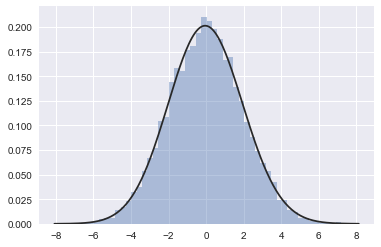

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

sns.distplot(np.random.normal(0, 2, 10000), kde=False, fit=stats.gamma);

### Task 2

In [2]:
# Gambler ruin game for two players:
#  player_bank: int - initial number of coins for player
#  opponent_bank: int - initial number of coins for opponent 
#  p: float - propability of player win
#  max_i: int - maximum number of iterations allowed
def gambler_ruin(player_bank, opponent_bank, p, max_i):
    player = player_bank
    opponent = opponent_bank
    hist_player = [player]
    hist_opponent = [opponent]
    i = max_i
    while 0 < player < (player_bank + opponent_bank) and 0 < i:
        result = (-1, 1) if p < np.random.random() else (1, -1)
        player += result[0]
        opponent += result[1]
        hist_player.append(player)
        hist_opponent.append(opponent)
        i -= 1
    return {"player":hist_player, "opponent":hist_opponent}

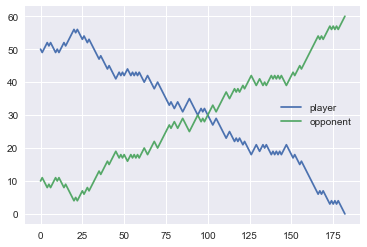

In [3]:
result = gambler_ruin(50, 10, 0.42, 1000)    
plt.plot(result["player"], label="player");
plt.plot(result["opponent"], label="opponent");
plt.legend(loc='best')
plt.show()

### Task 3

In [4]:
# Propability for -fair- coin flipping
#  n1: int - first player coins
#  n2: int - second player coins
def fair_propability(n1, n2):
    return n2 / (n1 + n2)

# Propability for -unfair- coin flipping 
#  n1: int - first player coins
#  n2: int - second player coins
#  p: float - propability of player win
#  q: float - propability of opponent win
def unfair_propability(n1, n2, p, q):
    # Note that p + q should always be equal to 1 !!!
    if p == 0.5 or q ==0.5:
        return fair_propability(n1, n2)
    return (1 - (p / q) ** n2) / (1 - (p / q) ** (n1 + n2))

# Propability of gambler ruin for two players (analitical approach)
#  player_bank: int - initial number of coins for player
#  opponent_bank: int - initial number of coins for opponent 
#  p: float - propability of player win
#  q: float - propability of opponent win
def analitical_gambler_ruin(player_bank, opponent_bank, p, q):
    player_propability = unfair_propability(player_bank, opponent_bank, p, q)
    return (player_propability, 1 - player_propability)

# Combine result from actual gambler ruin and analytical result
#  bankroll_range: int - a range that will be used as the initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def generate_results(tests, bankroll_range, propability, max_i):    
    player_results = []
    player_losing_predictions = []
    for bankroll in bankroll_range:
        tests_losts = 0
        tests_won = 0
        analitical_result = analitical_gambler_ruin(bankroll, bankroll, propability, 1-propability)[0]
        for _ in range(0, tests):
            result = gambler_ruin(bankroll, bankroll, propability, max_i)
            tests_losts += 1 if result["player"][-1] == 0 else 0
        player_results.append(tests_losts/tests)
        player_losing_predictions.append(analitical_result)
    return [player_results, player_losing_predictions]

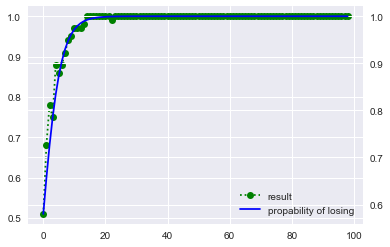

In [5]:
def plot_and_show(values, twinx_values, title, twinx_title, color, twinx_color):
    fig, axis = plt.subplots()
    twinx_axis = axis.twinx()
    lines = axis.plot(values, label=title, color=color, marker='o', linestyle=":")
    lines += twinx_axis.plot(twinx_values, label=twinx_title, color=twinx_color)
    labels = [line.get_label() for line in lines]
    plt.legend(lines, labels, loc='best')
    plt.show()

results = generate_results(100, range(1, 100), 0.42, 10000)
plot_and_show(results[0], results[1], "result", "propability of losing", "g", "b")

### Task 4

In [6]:
# Get total of turns for each testes game
#  tests: int - a numer of test -> how many games will be played
#  bankroll: int - initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def number_of_games_to_end(tests, bankroll, propability, max_i = 1000):
    tests_results = []
    for _ in range(0, tests):
        game_result = gambler_ruin(bankroll, bankroll, propability, max_i)
        tests_results.append(len(game_result["player"] + game_result["player"]))
    return tests_results

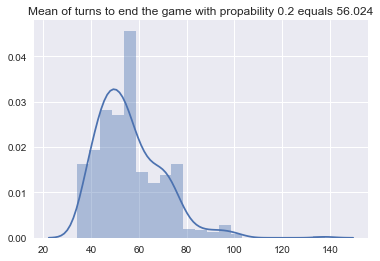

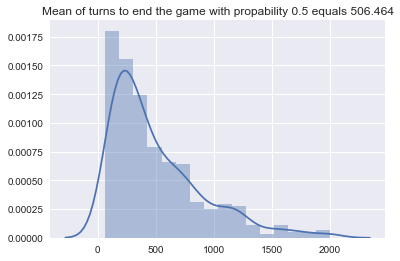

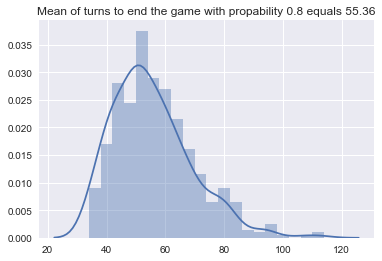

In [7]:
def plot_and_show(data, title):
    sns.distplot(data)
    plt.title(title)
    plt.show()
    
propabilities = [0.2, 0.5, 0.8]
for propability in propabilities:
    game_results = number_of_games_to_end(500, 16, propability)
    plot_and_show(game_results, "Mean of turns to end the game with propability " + str(propability) + " equals " + str(np.mean(game_results)))

### Task 6

In [8]:
# Return players bankroll after desired amount of games played
#  plays: int - a numer of test -> how many games will be played
#  bankroll: int - initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def players_bankroll_after(plays, bankroll, propability, max_i = 1000):
    results = [ gambler_ruin(bankroll, bankroll, propability, max_i)["player"][-1] for _ in range(plays)]
    return results

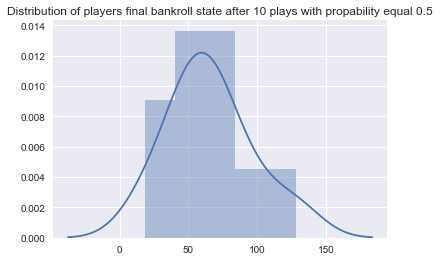

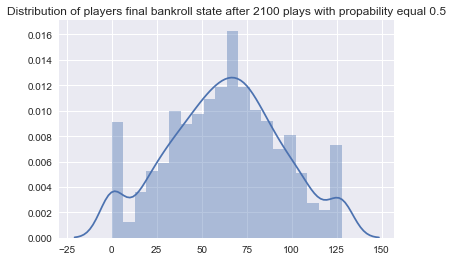

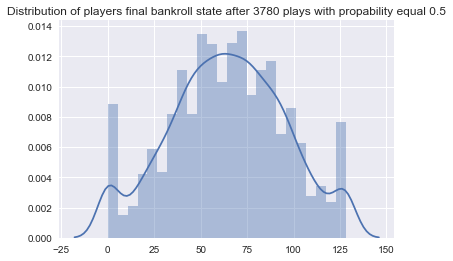

In [9]:
propability = 0.5
n_bar = 4200
playsarr = [10, int(0.5 * n_bar), int(0.9 * n_bar)]

for plays in playsarr:
    results = players_bankroll_after(plays, 64, propability)
    plot_and_show(results, "Distribution of players final bankroll state after " + str(plays) + " plays with propability equal " + str(propability))

### Task 7

In [10]:
# Return propability of losing after desired amount of tests, propability and bankroll
#  tests: int - a numer of test -> how many games will be played
#  bankroll: int - initial nuber of coins for both players
#  propability: float - propability of player win
#  max_i: int 
def propability_of_losing(tests, bankroll, propability, max_i = 1000):
    results = [gambler_ruin(bankroll, bankroll, propability, max_i)["player"][-1] == 0 for _ in range(tests)]
    return np.mean(results)

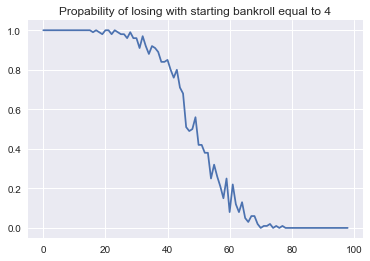

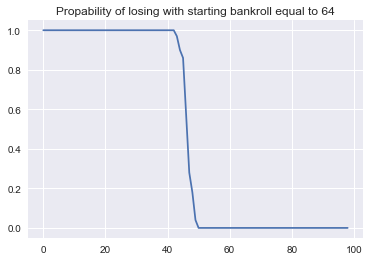

In [13]:
bankrolls = [4, 64]
for bankroll in bankrolls:
    results = [propability_of_losing(100, bankroll, propability/100) for propability in range(1, 100)]
    plt.plot(results)
    plt.title("Propability of losing with starting bankroll equal to " +  str(bankroll))
    plt.show()